# HR ATTRIBUTION

In [84]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [85]:
df = pd.read_csv("HR_Analytics.csv")

In [86]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [87]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

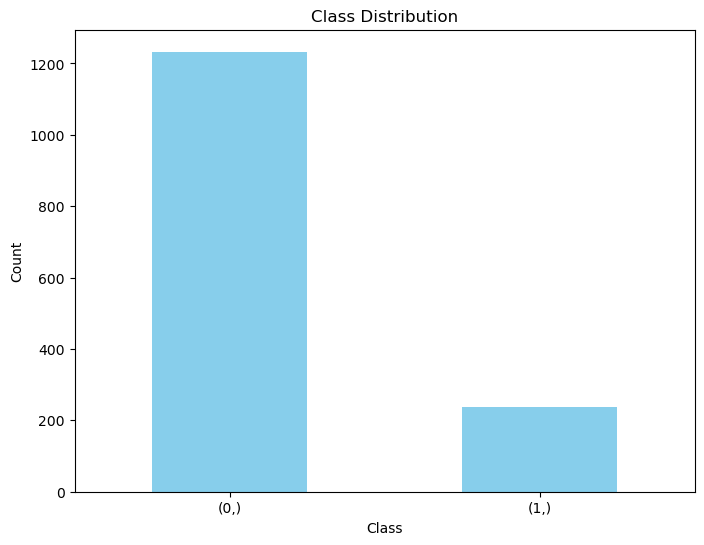

In [88]:
class_counts = y.value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()



In [89]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True) # drop_first true ensures no two-columns - would cause multicollinearity




In [90]:
x_train,x_test,y_train,y_test=train_test_split(X,
 y, test_size=0.20, random_state=42)


# 2.) Using the default Decision Tree. What is the IN/Out of Sample accuracy?

In [91]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.76


# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [92]:

# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [93]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot ......

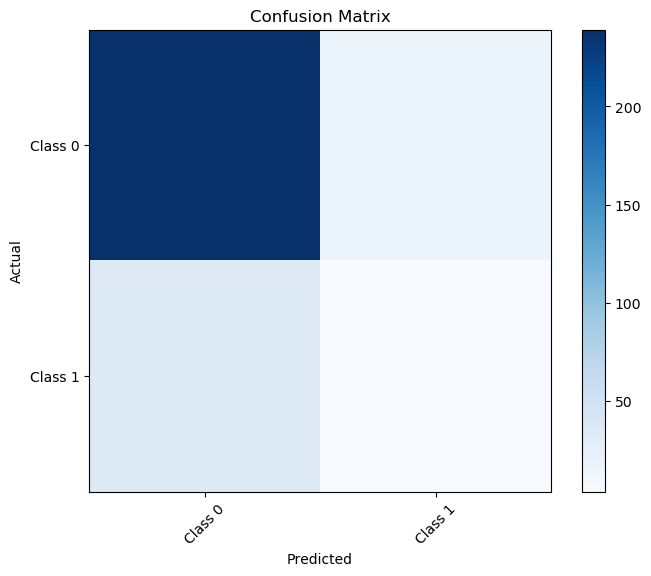

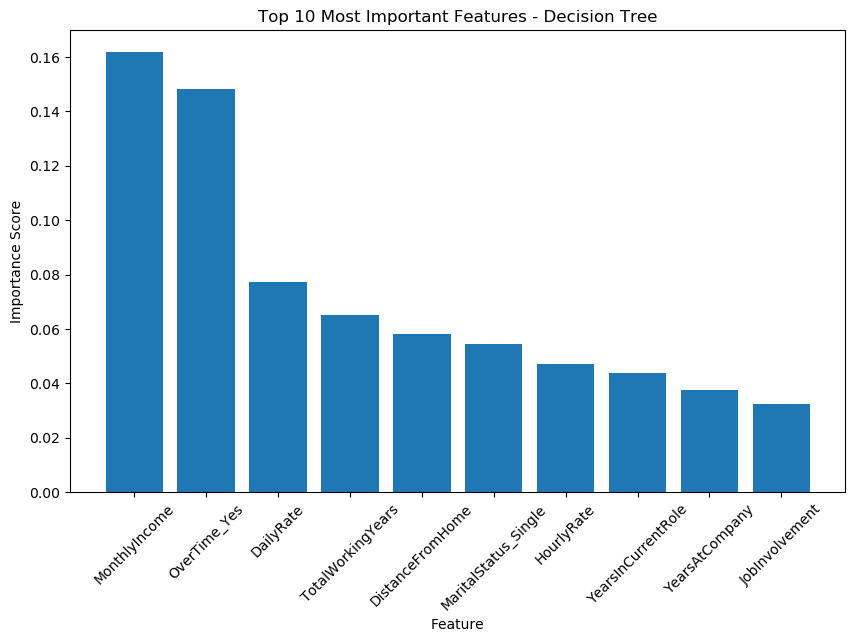

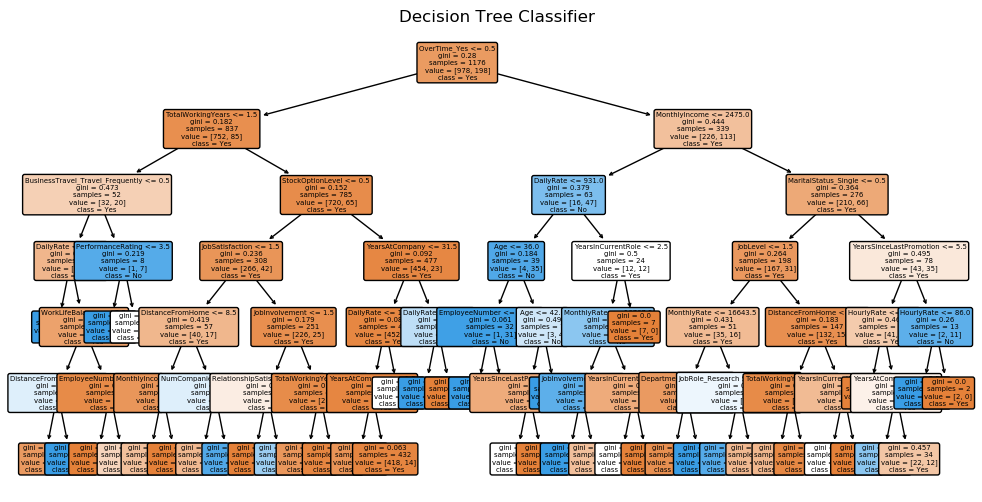

In [94]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation=45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Yes", "No"], rounded=True, fontsize=5)
plt.title('Decision Tree Classifier')
plt.show()

## Decision true: lower gini, more blue


# 5.) Looking at the graphs. what would be your suggestions to try to improve employee retention? What additional information would you need for a better plan. Calculate anything you think would assist in your assessment.

## ANSWER :

In [114]:
np.corrcoef(np.array(X["OverTime_Yes"]), np.array(y["Attrition"]))

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

In [115]:
np.corrcoef(np.array(X["MonthlyIncome"]), np.array(y["Attrition"]))

array([[ 1.        , -0.15983958],
       [-0.15983958,  1.        ]])

First, we see that the most importance variables are monthly income and allowing overtime, so therefore these are things that should be considered when trying to improve employee retention. The decision tree also shows nodes that are a darker blue have a smaller gini coefficient and therefore less inequality. To further analyze, we could conduct a regression model on some of these features, as they all have positive importance so such an approach could help us further analyze what might be most effective in improving employee retention. Additonally, like done above for OverTime_Yes and MonthlyIncome, we could calculate the correlative coefficients to see the direction of relationship, as our plots above don't show us much of this information. For instance, we see that there is a positive correlation between OverTime_Yes and Attrition, indicating that the more someone works overtime, the more likely they are to leave the job, and we also see a negative correlation between MonthlyIncome and Attrition, indicating that a higher monthly incoming might correspond to an individual being less likely to leave their job.

# 6.) Using the Training Data, if they made everyone stop overtime work. What would have been the expected difference in employee retention?

In [96]:
x_train_experiment = x_train.copy()

In [97]:
x_train_experiment["OverTime_Yes"] = 0 #everyone stops overtime work

In [98]:
y_pred_experiment = clf.predict(x_train_experiment)
y_pred = clf.predict(x_train)

In [100]:
print("Stopping overtime work would have prevented", sum(y_pred - y_pred_experiment), "people from leaving. In other words, the expected difference would be 59 more employees would have stayed.") #if someone left company with working overtime - if someone left without working overtime
# = total number of people we wouldve saved from leaving

Stopping overtime work would have prevented 59 people from leaving. In other words, the expected difference would be 59 more employees would have stayed.


# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [101]:
x_train_experiment["Y"] = y_pred
x_train_experiment["Y_exp"] = y_pred_experiment
x_train_experiment["Ret_Change"] = x_train_experiment["Y"] - x_train_experiment["Y_exp"]

In [102]:
# Change in Training Cost (Savings)
sav =  sum(x_train_experiment["Ret_Change"] *2.8* x_train_experiment["MonthlyIncome"])

In [103]:
# Cost of lost Overtime
cost = len(x_train[x_train["OverTime_Yes"] == 1])*2000
print("Profit from this experiment:", sav-cost)

Profit from this experiment: -117593.99999999977


Therefore, since the removal of overtime results in a negative profit of around \\$117594, it is not profitable and we should not remove the option of working overtime. To maximize company profits, the company should allow as many people as possible to work overtime, so as not to endure the costs of not allowing an employee to work overtime of \$2000 per person.

## ANSWER : 

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [104]:
raise_amount = 500 # raise each persons income by 500

In [110]:
profits = []
for raise_amount in range(-1000,1000,100):
    x_train_experiment = x_train.copy()
    x_train_experiment["MonthlyIncome"] = x_train_experiment["MonthlyIncome"] + raise_amount
    y_pred_experiment = clf.predict(x_train_experiment)
    y_pred = clf.predict(x_train)
    x_train_experiment["Y"] = y_pred
    x_train_experiment["Y_exp"] = y_pred_experiment
    x_train_experiment["Ret_Change"] = x_train_experiment["Y"] - x_train_experiment["Y_exp"]
    print("Retention difference:", sum(x_train_experiment["Ret_Change"]))
    sav =  sum(x_train_experiment["Ret_Change"] *2.8* x_train_experiment["MonthlyIncome"])
    cost = raise_amount*len(x_train)
    print("Profit from this experiment:", sav-cost)
    profits.append(sav-cost)

Retention difference: -16
Profit from this experiment: 1087584.4
Retention difference: -14
Profit from this experiment: 979524.0
Retention difference: -13
Profit from this experiment: 864992.8
Retention difference: -12
Profit from this experiment: 750738.8
Retention difference: -12
Profit from this experiment: 629778.8
Retention difference: -9
Profit from this experiment: 530138.0
Retention difference: -7
Profit from this experiment: 424200.0
Retention difference: -4
Profit from this experiment: 326096.4
Retention difference: -1
Profit from this experiment: 228440.8
Retention difference: -1
Profit from this experiment: 110714.8
Retention difference: 0
Profit from this experiment: 0.0
Retention difference: 6
Profit from this experiment: -75328.40000000001
Retention difference: 15
Profit from this experiment: -127503.60000000002
Retention difference: 15
Profit from this experiment: -240914.8
Retention difference: 21
Profit from this experiment: -311586.80000000005
Retention difference: 2

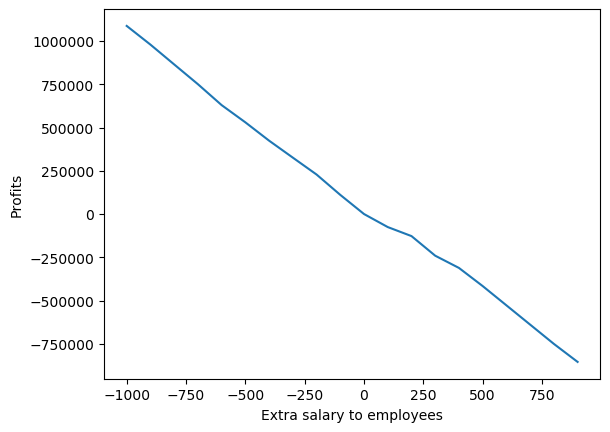

In [112]:
plt.plot(range(-1000,1000,100), profits)
plt.xlabel("Extra salary to employees")
plt.ylabel("Profits")
plt.show()

## ANSWER :

From the results above, we see that we can increase employee retention, saving around 22 people from leaving, but when we do so, we have negative profits, or a loss. On the other hand, when employee retention goes down (losing employees), our profits increase greatly. This is visualized in the plot, where providing additional salary to employees has a negative relationship with profits. From these results, I would suggest that keeping the extra 22 employees is not worth enduring up to around \\$850,000 in loss, and instead, something like losing 1 to 10 employees would actually increase our profits greatly, without too little employee retention. To maximize profits, we can see that in fact reducing salaries by around \\$1000 would maximize profits at about $1,090,000, and losing around 16 employees which is not terrible.